# Feature Engineering: Outlier Detection and Removal

## 1. Percentile Method

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df=pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [118]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [119]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [120]:
df.drop(['reviews_per_month','last_review'],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)

In [121]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

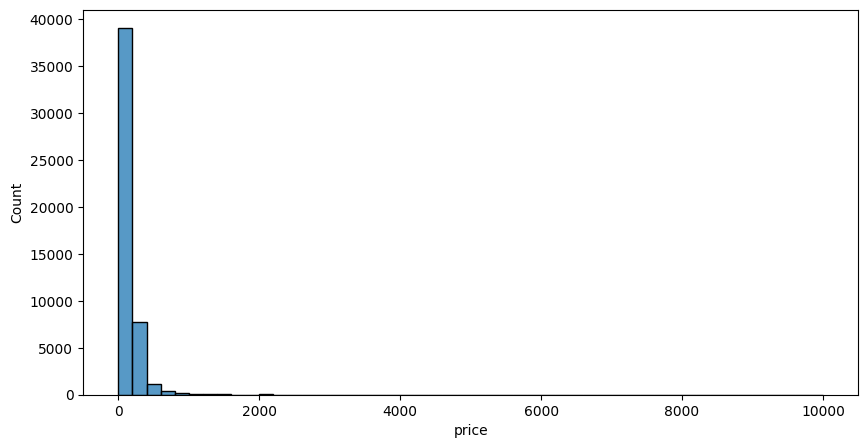

In [122]:
plt.figure(figsize=(10,5))
sns.histplot(df.price,bins=50)

In [123]:
df.drop(df[df.price==0].index,axis=0,inplace=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

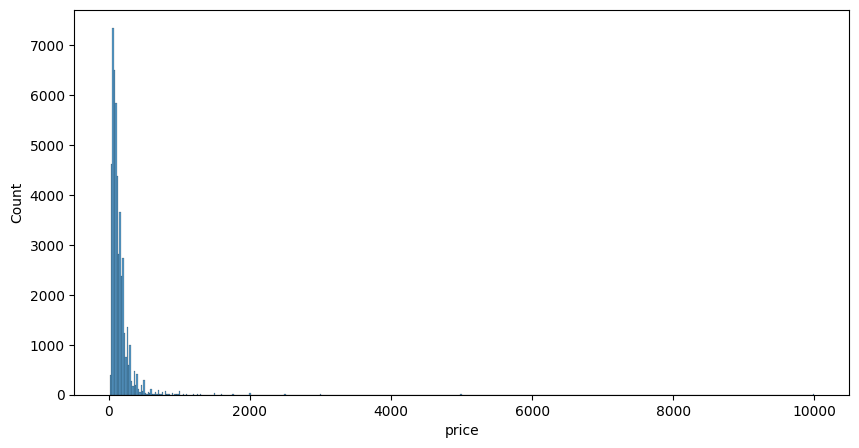

In [124]:
plt.figure(figsize=(10,5))
sns.histplot(df.price,bins=500)

In [125]:
df['price_per_night']=df['price']/df['minimum_nights']

In [126]:
df.price_per_night.describe()

count    48847.000000
mean        70.185607
std        157.681863
min          0.040000
25%         20.000000
50%         44.500000
75%         81.500000
max       8000.000000
Name: price_per_night, dtype: float64

In [127]:
min_thresh=df.price_per_night.quantile(0.05)
max_thresh=df.price_per_night.quantile(0.999)

In [128]:
min_thresh,max_thresh

(3.3333333333333335, 2000.0)

In [129]:
df.drop(df[df.price_per_night<min_thresh].index,inplace=True)

In [130]:
df.drop(df[df.price_per_night>max_thresh].index,inplace=True)
#df[df.price_per_night>max_thresh]

In [131]:
df.price_per_night.describe()

count    46409.000000
mean        70.281946
std         98.457099
min          3.333333
25%         23.333333
50%         47.500000
75%         85.000000
max       2000.000000
Name: price_per_night, dtype: float64

<AxesSubplot:xlabel='price_per_night', ylabel='Count'>

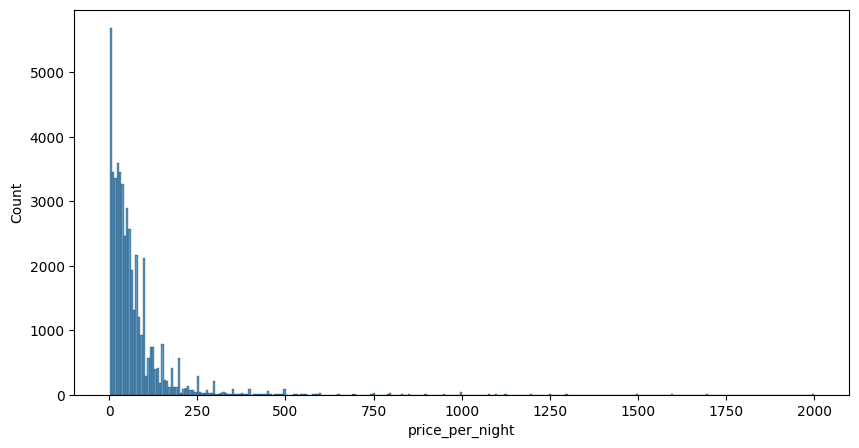

In [114]:
plt.figure(figsize=(10,5))
sns.histplot(df.price_per_night,bins=300)

In [185]:
# NEW-Dataset
df2=pd.read_csv('bhv.csv')
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [186]:
df2.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [187]:
df2.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [188]:
min_thresh=df2.price_per_sqft.quantile(0.005)
max_thresh=df2.price_per_sqft.quantile(0.99)
df2.drop(df2[(df2.price_per_sqft<min_thresh)|(df2.price_per_sqft>max_thresh)].index,inplace=True)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

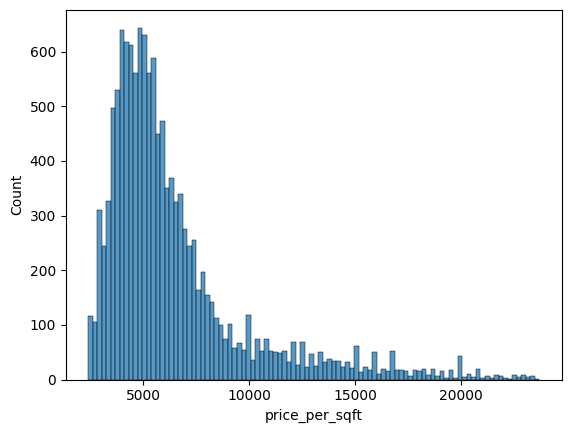

In [189]:
sns.histplot(df2.price_per_sqft,bins=100)

## 2. Using Standard Deviation and Z-Score

In [190]:
df2.price_per_sqft.mean()

6476.091293647131

In [191]:
min_thresh_std=df2.price_per_sqft.mean()-3*df2.price_per_sqft.std()
max_thresh_std=df2.price_per_sqft.mean()+3*df2.price_per_sqft.std()
min_thresh_std,max_thresh_std

(-4037.5762143425063, 16989.75880163677)

In [192]:
df2['z-score']=(df2['price_per_sqft']-df2.price_per_sqft.mean())/df2.price_per_sqft.std()

In [193]:
df2.drop(df2[(df2.price_per_sqft>max_thresh_std)|(df2.price_per_sqft<min_thresh_std)].index,inplace=True)
df2.price_per_sqft.describe()

count    12676.000000
mean      6139.428684
std       2828.107731
min       2399.000000
25%       4250.000000
50%       5341.500000
75%       7027.250000
max      16959.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

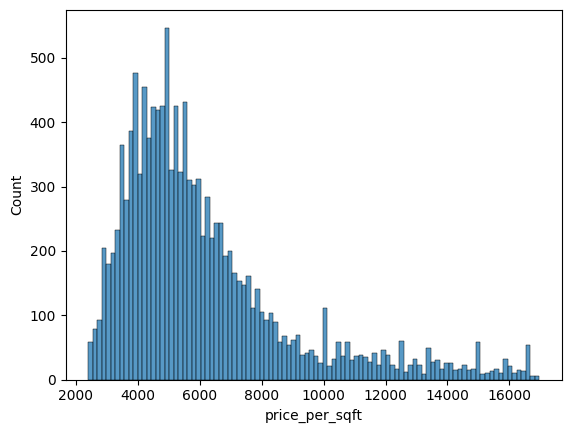

In [194]:
sns.histplot(df2.price_per_sqft,bins=100)

In [195]:
df2['z-score'].describe()
df2.drop(df2[(df2['z-score']>3)|(df2['z-score']<-3)].index,inplace=True)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

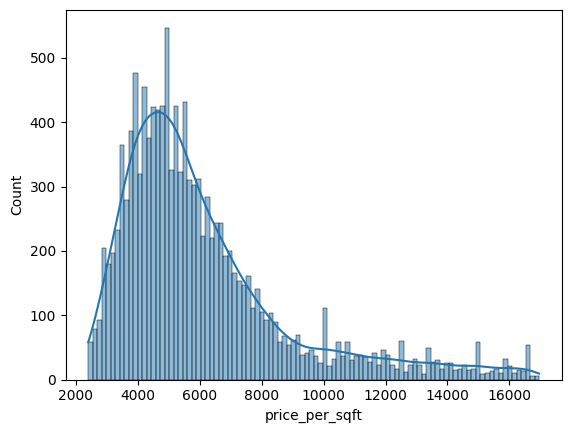

In [196]:
sns.histplot(df2.price_per_sqft,bins=100,kde=True)

## 3. Using IQR

In [198]:
df3=pd.read_csv('heightweight.csv')

In [201]:
df3.isna().sum()

gender    0
height    0
weight    0
dtype: int64

<AxesSubplot:xlabel='height', ylabel='Count'>

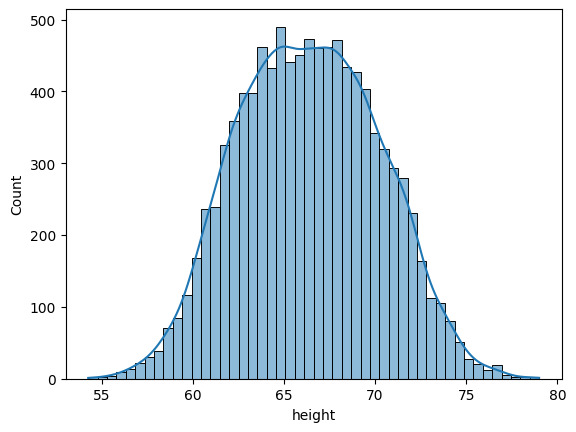

In [211]:
#Height 

sns.histplot(df3.height,kde=True)


<AxesSubplot:>

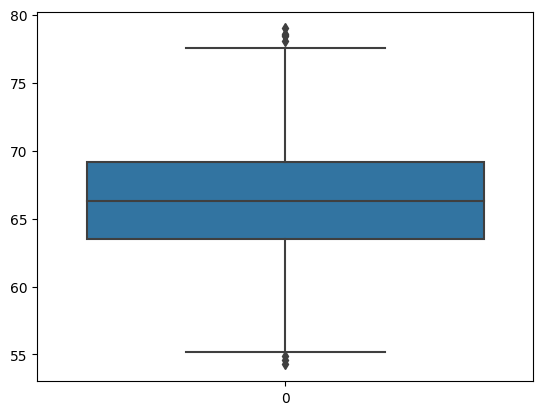

In [213]:
sns.boxplot(df3.height)

In [220]:
Q1=df3.height.quantile(0.25)
Q3=df3.height.quantile(0.75)
IQR=Q3-Q1
IQR,Q1,Q3

(5.668641245615746, 63.505620481218955, 69.1742617268347)

In [223]:
df_new_height=df3.drop(df3[(df3.height>Q3+1.5*IQR)|(df3.height<Q1-1.5*IQR)].index)

In [224]:
df_new_height

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='height', ylabel='Count'>

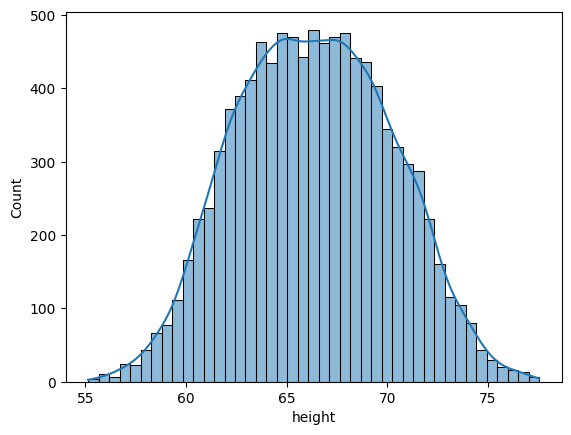

In [225]:
sns.histplot(df_new_height.height,kde=True)

<AxesSubplot:>

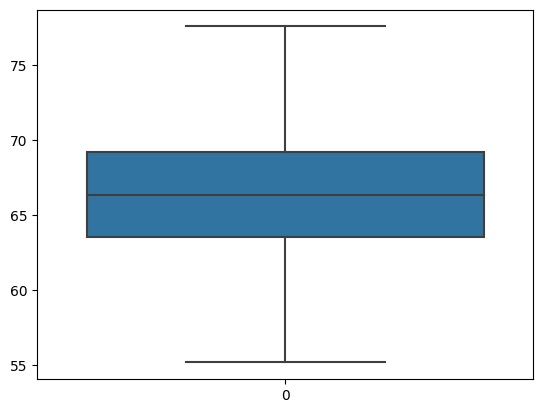

In [226]:
sns.boxplot(df_new_height.height)

In [229]:
#Weight
Q1_W=df3.weight.quantile(.25)
Q3_W=df3.weight.quantile(.75)
IQR_W=Q3_W-Q1_W
IQR_W,Q3_W,Q1_W

(51.35147356318197, 187.16952486868348, 135.8180513055015)

<AxesSubplot:xlabel='weight', ylabel='Count'>

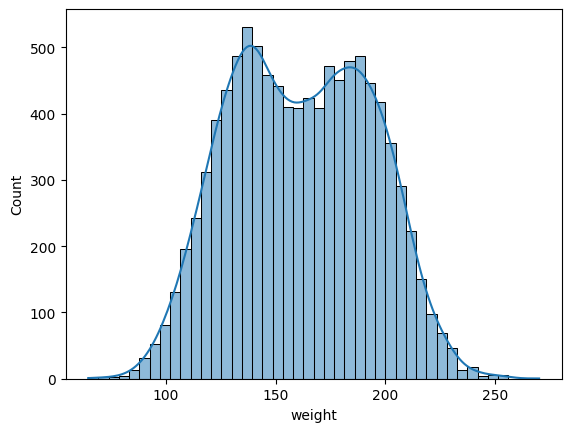

In [230]:
sns.histplot(df3.weight,kde=True)

<AxesSubplot:>

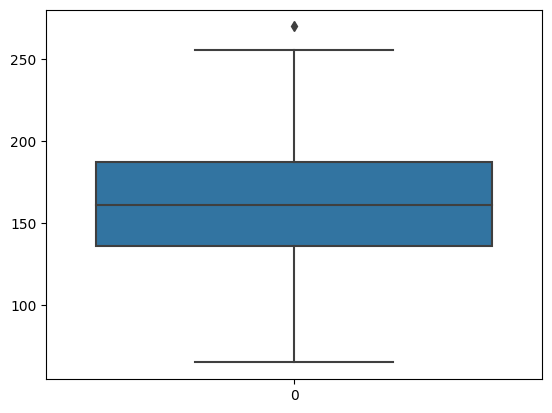

In [231]:
sns.boxplot(df3.weight)

In [237]:
df_new_weight=df3.drop(df3[(df3.weight<Q1_W-1.5*IQR_W)|(df3.weight>Q3_W+1.5*IQR_W)].index)
df_new_weight

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='weight', ylabel='Count'>

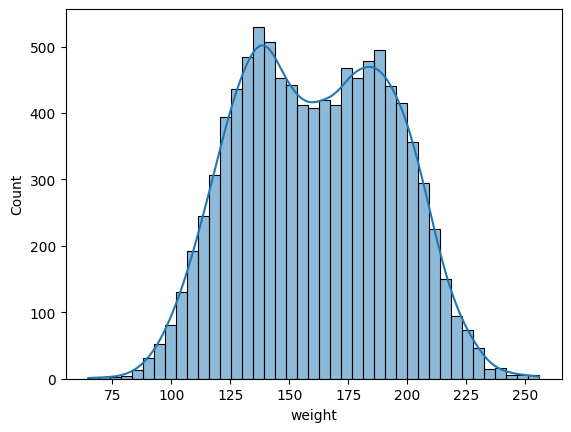

In [239]:
sns.histplot(df_new_weight.weight,kde=True)

<AxesSubplot:>

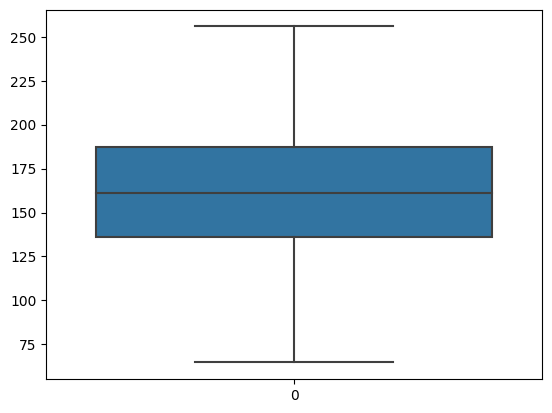

In [240]:
sns.boxplot(df_new_weight.weight)